Chapter 10 : Performance Python


In [401]:
import random

In [402]:
def average_py(n):
    s=0
    for i in range(n):
        s += random.random()
    return s /n

In [403]:
n= 10000000

In [404]:
%time average_py(n)

CPU times: user 550 ms, sys: 912 μs, total: 551 ms
Wall time: 567 ms


0.500035630578602

In [405]:
%time sum([random.random() for _ in range(n)])/n

CPU times: user 705 ms, sys: 171 ms, total: 876 ms
Wall time: 875 ms


0.5000428587568914

In [406]:
import numpy as np

In [407]:
def average_np(n):
    s = np.random.random(n) # draws the random numbers "all at once" (no python loop)
    return s.mean() # returns average value

In [408]:
%time average_np(n)

CPU times: user 76.1 ms, sys: 6.01 ms, total: 82.1 ms
Wall time: 81.2 ms


np.float64(0.4999809771090284)

In [409]:
%timeit average_np(n)

82.4 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [410]:
s= np.random.random(n)
s.nbytes # number of bytes used for the created ndarray object.

80000000

In [411]:
import numba

In [412]:
average_nb = numba.jit(average_py)

In [413]:
%time average_nb(n)
# The compiling happens during runtime, leading to some overhead.

CPU times: user 158 ms, sys: 0 ns, total: 158 ms
Wall time: 157 ms


0.5000950229660269

In [414]:
%time average_nb(n)
# From the second execution (with the same input data types), the execution is faster.

CPU times: user 138 ms, sys: 54 μs, total: 138 ms
Wall time: 137 ms


0.49987963226051

In [415]:
%timeit average_nb(n)

95.9 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [416]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [417]:
%%cython -a
import random
def average_cy1(int n):
    cdef int i
    cdef float s = 0
    for i in range(n):
        s+= random.random()
    return s /n

In [418]:
%time average_cy1(n)

CPU times: user 628 ms, sys: 1.07 ms, total: 629 ms
Wall time: 625 ms


0.5000118017196655

In [419]:
%timeit average_cy1(n)

627 ms ± 7.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [420]:
def is_prime(I):
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [421]:
n = int(1e8 + 3)
n

100000003

In [422]:
%time is_prime(n)

CPU times: user 35 μs, sys: 1e+03 ns, total: 36 μs
Wall time: 39.6 μs


False

In [423]:
p1 = int(1e8 + 7)
p1

100000007

In [424]:
%time is_prime(p1)

CPU times: user 495 μs, sys: 0 ns, total: 495 μs
Wall time: 508 μs


True

In [425]:
p2 = 100109100129162907

In [426]:
p2.bit_length()

57

In [427]:
%time is_prime(p2)

CPU times: user 7.63 s, sys: 0 ns, total: 7.63 s
Wall time: 7.63 s


True

In [428]:
is_prime_nb = numba.jit(is_prime)

In [429]:
%time is_prime_nb(n)

CPU times: user 61.3 ms, sys: 1.01 ms, total: 62.3 ms
Wall time: 61.6 ms


False

In [430]:
%time is_prime_nb(n)

CPU times: user 9 μs, sys: 0 ns, total: 9 μs
Wall time: 11.7 μs


False

In [431]:
%time is_prime_nb(p2)

CPU times: user 486 ms, sys: 44 μs, total: 486 ms
Wall time: 484 ms


True

In [432]:
%%cython
def is_prime_cy1(I):
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [433]:
%timeit is_prime(p1)

230 μs ± 3.29 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [434]:
%timeit is_prime_cy1(p1)

141 μs ± 1.5 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [435]:
%%cython
def is_prime_cy2(long I): # Static declarations for the two variables I and i
    cdef long i
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [436]:
%timeit is_prime_cy2(p1)

15.4 μs ± 95.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [437]:
%time is_prime_nb(p2)

CPU times: user 486 ms, sys: 0 ns, total: 486 ms
Wall time: 483 ms


True

In [438]:
%time is_prime_cy2(p2)

CPU times: user 487 ms, sys: 1.04 ms, total: 488 ms
Wall time: 485 ms


True

Multiprocessing


In [439]:
import multiprocessing as mp

In [440]:
pool = mp.Pool(processes=4) # mp.Pool object is instantiated with multiple precesses.

In [441]:
%time pool.map(is_prime, 10*[p1]) # Then the respective function is mapped to a list object with prime numbers.

CPU times: user 1.02 ms, sys: 1.97 ms, total: 2.99 ms
Wall time: 2.63 ms


[True, True, True, True, True, True, True, True, True, True]

In [442]:
%time pool.map(is_prime_nb, 10*[p2])

CPU times: user 692 μs, sys: 3.99 ms, total: 4.69 ms
Wall time: 1.54 s


[True, True, True, True, True, True, True, True, True, True]

In [443]:
%time pool.map(is_prime_cy2, 10*[p2])

CPU times: user 2.69 ms, sys: 951 μs, total: 3.64 ms
Wall time: 1.48 s


[True, True, True, True, True, True, True, True, True, True]

Fibonacci Numbers

In [444]:
def fib_rec_py1(n):
    if n<2:
        return n
    else:
        return fib_rec_py1(n-1)+fib_rec_py1(n-2)

In [445]:
%time fib_rec_py1(35)

CPU times: user 1.28 s, sys: 0 ns, total: 1.28 s
Wall time: 1.28 s


9227465

In [446]:
fib_rec_nb = numba.jit(fib_rec_py1)

In [447]:
# %time fib_rec_nb(35)

In [448]:
%%cython
def fib_rec_cy(int n):
    if n<2:
        return n
    else:
        return fib_rec_cy(n-1) + fib_rec_cy(n-2)

In [449]:
%time fib_rec_cy(35)

CPU times: user 652 ms, sys: 1.08 ms, total: 653 ms
Wall time: 649 ms


9227465

The major problem with the recursive algorithm is that intermediate results are not
cached but rather recalculated. To avoid this particular problem, a decorator can be
used that takes care of the caching of intermediate results. This speeds up the execu‐
tion by multiple orders of magnitude

In [450]:
from functools import lru_cache as cache


In [451]:
@cache(maxsize=None)
def fib_rec_py2(n):
    if n<2:
        return n
    else:
        return fib_rec_py2(n-1) + fib_rec_py2(n-2)

In [452]:
%time fib_rec_py2(35)

CPU times: user 36 μs, sys: 0 ns, total: 36 μs
Wall time: 39.1 μs


9227465

In [453]:
%time fib_rec_py2(80)

CPU times: user 59 μs, sys: 0 ns, total: 59 μs
Wall time: 62.5 μs


23416728348467685

In [454]:
%time fib_rec_py2(1000)

CPU times: user 601 μs, sys: 989 μs, total: 1.59 ms
Wall time: 1.6 ms


43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

In [455]:
def fib_it_py(n):
    x, y = 0,1
    for i in range(1, n+1):
        x, y =y, x+y
    return x

In [456]:
%time fib_it_py(80)

CPU times: user 14 μs, sys: 0 ns, total: 14 μs
Wall time: 17.6 μs


23416728348467685

In [457]:
fib_it_nb = numba.jit(fib_it_py)

In [458]:
%time fib_it_nb(80)

CPU times: user 64.8 ms, sys: 2.02 ms, total: 66.8 ms
Wall time: 78.8 ms


23416728348467685

In [459]:
%time fib_it_nb(80)

CPU times: user 8 μs, sys: 0 ns, total: 8 μs
Wall time: 10.3 μs


23416728348467685

In [460]:
%%cython
def fib_it_cy1(int n):
    cdef long i
    cdef long x=0, y=1
    for i in range(1, n+1):
        x, y = y, x+y
    return x

In [461]:
%time fib_it_cy1(80)

CPU times: user 9 μs, sys: 0 ns, total: 9 μs
Wall time: 12.9 μs


23416728348467685

In [462]:
%%time
fn = fib_rec_py2(150)
print(fn)

9969216677189303386214405760200
CPU times: user 213 μs, sys: 6 μs, total: 219 μs
Wall time: 226 μs


In [463]:
fn.bit_length()

103

In [464]:
%%time
fn = fib_it_nb(150)
print(fn)

6792540214324356296
CPU times: user 388 μs, sys: 0 ns, total: 388 μs
Wall time: 331 μs


In [465]:
fn.bit_length()

63

In [466]:
fn = fib_it_cy1(150)
print(fn)

6792540214324356296


In [467]:
fn.bit_length()

63

In [468]:
%%cython
cdef extern from *:
    ctypedef int int128 '__int128_t'
def fib_it_cy2(int n):
    cdef int128 i
    cdef int128 x=0, y=1
    for i in range (1,n+1):
        x,y=y, x+y
    return x

In [469]:
%%time
fn = fib_it_cy2(150)
print(fn)

9969216677189303386214405760200
CPU times: user 127 μs, sys: 4 μs, total: 131 μs
Wall time: 119 μs


In [470]:
fn.bit_length()

103

The Number Pi

In [471]:
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [472]:
rn = [(random.random()*2 -1, random.random()*2-1) for _ in range(500)]

In [473]:
rn = np.array(rn)
rn[:5]

array([[-0.46837442,  0.07390799],
       [ 0.86483707,  0.43867986],
       [-0.93097862,  0.25679818],
       [-0.17547089,  0.26766641],
       [ 0.30490913, -0.60248034]])

(-1.1, 1.1)

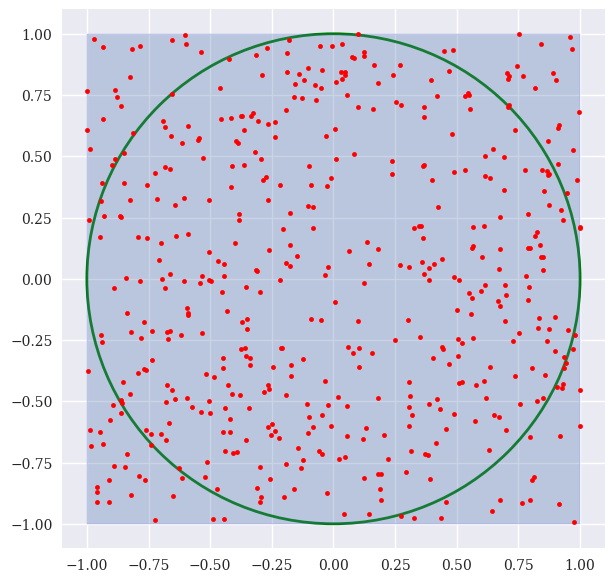

In [474]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
circ = plt.Circle((0,0), radius=1, edgecolor='g', lw=2.0, facecolor='None')
box = plt.Rectangle((-1,-1),2,2,edgecolor='b', alpha=0.3)
ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:,0], rn[:,1],'r.')
plt.ylim(-1.1,1.1)
plt.xlim(-1.1,1.1)

Figure 10-1. Unit circle and quare with side length 2 with uniformly distributed random points

In [475]:
n = int(1e7)

In [476]:
%time rn = np.random.random((n,2))*2-1 
# The distance of the points from the origin (Euclidean norm)

CPU times: user 268 ms, sys: 20 ms, total: 288 ms
Wall time: 289 ms


In [477]:
rn.nbytes

160000000

In [478]:
%time distance = np.sqrt((rn**2).sum(axis=1))
distance[:8].round(3)

CPU times: user 210 ms, sys: 47 ms, total: 257 ms
Wall time: 257 ms


array([0.889, 0.332, 0.821, 0.878, 1.073, 0.634, 0.179, 0.332])

In [479]:
%time frac = (distance <= 1.0).sum() / len(distance) 
# The raction of those points on the circle relative to all points

CPU times: user 13.9 ms, sys: 8.01 ms, total: 21.9 ms
Wall time: 20.6 ms


In [480]:
pi_mcs =frac*4
pi_mcs
# This accounts for the quare are of 4 for the estimation of the circel area and therewith of pi

np.float64(3.1418104)

In [481]:
def mcs_pi_py(n):
    circle = 0
    for _ in range(n):
        x,y = random.random(), random.random()
        if (x**2 +y**2)**0.5 <= 1:
            circle += 1
    return (4 *circle) /n

In [482]:
%time mcs_pi_py(n)

CPU times: user 2.56 s, sys: 1.89 ms, total: 2.56 s
Wall time: 2.56 s


3.1412108

In [483]:
mcs_pi_nb = numba.jit(mcs_pi_py)

In [484]:
%time mcs_pi_nb(n)

CPU times: user 329 ms, sys: 4.05 ms, total: 333 ms
Wall time: 332 ms


3.1416564

In [497]:
%%cython -a
import random
import math
def mcs_pi_cy1(int n):
    cdef int i, circle = 0
    cdef float x, y
    for i in range(n):
        x, y = random.random(), random.random()
        if math.sqrt(x ** 2 + y ** 2)  <= 1.0:
            circle += 1 
    return (4*circle)/n

In [498]:
%time mcs_pi_cy1(n)

CPU times: user 1.51 s, sys: 4.12 ms, total: 1.51 s
Wall time: 1.5 s


3.141606

In [499]:
%%cython -a
from libc.stdlib cimport rand
import math
cdef extern from 'limits.h':
    int INT_MAX
def mcs_pi_cy2(int n):
    cdef int i, circle = 0
    cdef float x, y
    for i in range(n):
        x, y = rand()/INT_MAX, rand()/INT_MAX
        if math.sqrt(x ** 2 + y ** 2) <= 1.0:
            circle += 1 
    return (4*circle)/n

In [500]:
%time mcs_pi_cy2(n)

CPU times: user 856 ms, sys: 1.11 ms, total: 857 ms
Wall time: 851 ms


3.1411304

In [495]:
import math

In [ ]:
S0 =36. # initial value of risky asset
T= 1.0 # time horizon for the finomial tree simulation
r=0.06 # constant short rate
sigma =0.2 # constant volatility factor

In [522]:
def simulate_tree(M):
    dt = T/M # length of the time intervals
    u = math.exp(sigma*math.sqrt(dt)) # factors for th eupward and downward movements
    d = 1/u # factors for th eupward and downward movements
    S = np.zeros((M+1, M+1))
    S[0,0] =S0
    z=1
    for t in range(1, M+1):
        for i in range(z):
            S[i, t] = S[i, t-1]*u
            S[i+1,t] = S[i, t-1]*d
        z +=1
    return S

In [503]:
np.set_printoptions(formatter={'float': lambda x : '%6.2f'% x})

In [504]:
simulate_tree(4)

array([[ 50.00,  55.26,  61.07,  67.49,  74.59],
       [  0.00,  45.24,  50.00,  55.26,  61.07],
       [  0.00,   0.00,  40.94,  45.24,  50.00],
       [  0.00,   0.00,   0.00,  37.04,  40.94],
       [  0.00,   0.00,   0.00,   0.00,  33.52]])

In [505]:
%time simulate_tree(500)

CPU times: user 94.7 ms, sys: 1.02 ms, total: 95.7 ms
Wall time: 97.5 ms


array([[ 50.00,  50.45,  50.90, ..., 4299.57, 4338.20, 4377.18],
       [  0.00,  49.55,  50.00, ..., 4223.34, 4261.29, 4299.57],
       [  0.00,   0.00,  49.11, ..., 4148.46, 4185.74, 4223.34],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.58,   0.59,   0.59],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.58,   0.58],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.57]],
      shape=(501, 501))

In [506]:
M =4


In [507]:
up= np.arange(M+1)
up = np.resize(up, (M+1, M+1))
up

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [508]:
down = up.T*2
down

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [4, 4, 4, 4, 4],
       [6, 6, 6, 6, 6],
       [8, 8, 8, 8, 8]])

In [509]:
up -down

array([[ 0,  1,  2,  3,  4],
       [-2, -1,  0,  1,  2],
       [-4, -3, -2, -1,  0],
       [-6, -5, -4, -3, -2],
       [-8, -7, -6, -5, -4]])

In [510]:
dt = T/M

In [511]:
S0 * np.exp(sigma*math.sqrt(dt)*(up-down))

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [514]:
def simulate_tree_np(M):
    dt = T/M
    up = np.arange(M+1)
    up = np.resize(up, (M+1, M+1))
    down = up.transpose()*2
    S = S0 * np.exp(sigma*math.sqrt(dt)*(up-down))
    return S

In [515]:
simulate_tree_np(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [516]:
%time simulate_tree_np(500)

CPU times: user 3.19 ms, sys: 3.01 ms, total: 6.2 ms
Wall time: 5.58 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [ 35.36,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [ 34.73,  35.05,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.41,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.40,   0.41,   0.41]],
      shape=(501, 501))

In [523]:
simulate_tree_nb = numba.jit(simulate_tree)

In [524]:
simulate_tree_nb(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [525]:
%time simulate_tree_nb(500)

CPU times: user 581 μs, sys: 0 ns, total: 581 μs
Wall time: 592 μs


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]],
      shape=(501, 501))

In [526]:
%timeit simulate_tree_nb(500)

283 μs ± 81 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [529]:
%cython -a
import numpy as np
cimport cython
from libc.math cimport exp, sqrt
Binomial Trees | 297
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef float sigma = 0.2
def simulate_tree_cy(int M):
    cdef int z, t, i
    cdef float dt, u, d
    cdef float[:, :] S = np.zeros((M + 1, M + 1),
        dtype=np.float32)
    dt = T / M
    u = exp(sigma * sqrt(dt))
    d = 1 / u
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return np.array(S)

SyntaxError: invalid syntax (3085595374.py, line 3)

In [530]:
M = 100
I = 50000


In [ ]:
def mcs_simulation_py(p):
    M, I =p
    dt = T/M
    S = np.zeros((M+1, I))
    S[0] =S0
    rn = np.random.standard_normal(S.shape) # The random numbers, drawn in s single vectorized step
    for t  in range( 1, M+1):
        for i in range(I):
            S[t, i] = S[t-1, i] * math.exp((r-sigma**2/2)*dt+sigma*math.sqrt(dt)*rn[t,i])
    return S

In [534]:
%time S = mcs_simulation_py((M,I))

CPU times: user 3.13 s, sys: 82.9 ms, total: 3.21 s
Wall time: 3.22 s


In [535]:
S[-1].mean()

np.float64(38.27212260491095)

In [ ]:
S0*math.exp(r*T) # The theoretically expected end of period value

38.22611567563295

In [ ]:
K = 40. # strike price of the European put option

In [538]:
C0 = math.exp(-r*T)*np.maximum(K-S[-1],0).mean()

In [ ]:
C0 # Monte Carlo extimator for the option

np.float64(3.809009646689001)

In [541]:
def mcs_simulation_np(p):
    M, I = p
    dt = T/M
    S = np.zeros((M+1,I))
    S[0] =S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M+1):
        S[t] = S[t-1]*np.exp((r-sigma**2/2)*dt+sigma*math.sqrt(dt)*rn[t])
    return S

In [542]:
%time S = mcs_simulation_np((M,I))

CPU times: user 208 ms, sys: 61 ms, total: 269 ms
Wall time: 282 ms


In [544]:
S[-1].mean()

np.float64(38.25848529507019)

In [545]:
%timeit S = mcs_simulation_np((M,I))

144 ms ± 4.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [546]:
mcs_simulation_nb = numba.jit(mcs_simulation_py)

In [549]:
%time S = mcs_simulation_nb((M,I))

CPU times: user 233 ms, sys: 34.1 ms, total: 267 ms
Wall time: 265 ms


In [548]:
S[-1].mean()

np.float64(38.23034709182259)

In [551]:
C0 = math.exp(-r*T)*np.maximum(K-S[-1],0).mean()

In [552]:
C0

np.float64(3.849822000731294)

In [553]:
%timeit S = mcs_simulation_nb((M,I))

272 ms ± 18.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [554]:
%%cython
import numpy as np
cimport numpy as np
cimport cython
from libc.math cimport exp, sqrt
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef float sigma = 0.2
@cython.boundscheck(False)
@cython.wraparound(False)
def mcs_simulation_cy(p):
    cdef int M, I
    M, I = p
    cdef int t, i
    cdef float dt = T / M
    cdef double[:, :] S = np.zeros((M + 1, I))
    cdef double[:, :] rn = np.random.standard_normal((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        for i in range(I):
            S[t, i] = S[t-1, i] * exp((r - sigma ** 2 / 2) * dt +
                    sigma * sqrt(dt) * rn[t, i])
    return np.array(S)

In [555]:
%time S = mcs_simulation_cy((M,I))

CPU times: user 216 ms, sys: 116 ms, total: 333 ms
Wall time: 332 ms


In [556]:
S[-1].mean()

np.float64(38.23122237184891)

In [557]:
%timeit S = mcs_simulation_cy((M,I))

235 ms ± 28.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Multiprocessing


In [558]:
import multiprocessing as mp

In [559]:
pool = mp.Pool(processes=4)

In [560]:
p =20

In [561]:
%timeit S = np.hstack(pool.map(mcs_simulation_np, p*[(M, int(I/p))]))

135 ms ± 7.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [562]:
%timeit S = np.hstack(pool.map(mcs_simulation_nb, p*[(M, int(I/p))]))

189 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [563]:
%timeit S = np.hstack(pool.map(mcs_simulation_cy, p*[(M, int(I/p))]))

200 ms ± 36.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [564]:
import pandas as pd

In [565]:
sym ='SPY'

In [571]:
data = pd.DataFrame(pd.read_csv('data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)[sym]).dropna()

In [572]:
alpha = 0.25

In [573]:
data['EWMA'] = data[sym]

In [574]:
%%time 
for t in zip(data.index, data.index[1:]):
    data.loc[t[1], 'EWMA'] = (alpha*data.loc[t[1],sym]+(1-alpha)*data.loc[t[0],'EWMA'])

CPU times: user 859 ms, sys: 3.92 ms, total: 863 ms
Wall time: 862 ms


In [575]:
data.head()

,SPY,EWMA
Date,,
2010-01-04,113.33,113.330000
2010-01-05,113.63,113.405000
2010-01-06,113.71,113.481250
2010-01-07,114.19,113.658438
2010-01-08,114.57,113.886328


<Axes: xlabel='Date'>

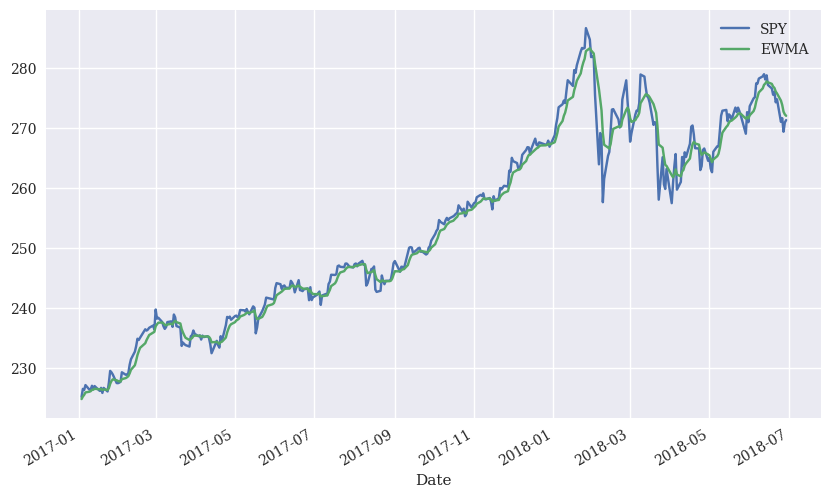

In [576]:
data[data.index > '2017-1-1'].plot(figsize=(10,6))

Figure 10-3. Financial time series with EWMA(Exponential weighted moving average)

In [577]:
def ewma_py(x, alpha):
    y = np.zeros_like(x)
    y[0] =x[0]
    for i in range(1, len(x)):
        y[i] = alpha*x[i]+(1-alpha)*y[i-1]
    return y

In [578]:
%time data['EWMA_PY'] = ewma_py(data[sym], alpha)

CPU times: user 20.4 ms, sys: 17 μs, total: 20.4 ms
Wall time: 19.7 ms


/tmp/ipykernel_3382/1409718494.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[0] =x[0]
/tmp/ipykernel_3382/1409718494.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] = alpha*x[i]+(1-alpha)*y[i-1]


In [579]:
%time data['EWMA_PY'] = ewma_py(data[sym].values, alpha)

CPU times: user 1.9 ms, sys: 2 μs, total: 1.9 ms
Wall time: 1.88 ms


In [580]:
ewma_nb = numba.jit(ewma_py)

In [582]:
%time data['EWMA_NB'] = ewma_nb(data[sym], alpha)

CPU times: user 324 μs, sys: 15 μs, total: 339 μs
Wall time: 345 μs


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
non-precise type pyobject
During: typing of argument at /tmp/ipykernel_3382/1409718494.py (1)

File "../../../../../../tmp/ipykernel_3382/1409718494.py", line 1:
<source missing, REPL/exec in use?>

During: Pass nopython_type_inference 

This error may have been caused by the following argument(s):
- argument 0: Cannot determine Numba type of <class 'pandas.core.series.Series'> 

This error may have been caused by the following argument(s):
- argument 0: Cannot determine Numba type of <class 'pandas.core.series.Series'>


In [583]:
%time data['EWMA_NB'] = ewma_nb(data[sym].value, alpha)

CPU times: user 126 μs, sys: 7 μs, total: 133 μs
Wall time: 139 μs


AttributeError: 'Series' object has no attribute 'value'